# Chapter 5 Equilibrium of a Rigid Body

## Section 5.1 Conditions for Rigid-Body Equilibrium
* We can use the same methods from the last chapter to reduce the force and couple moment system to an equivalent resultant force and couple moment at any point $O$
* Equilibrium - when both resultant force and couple moment are both equal to $0$ the body is equilibrium, $\vec F_R = \sum \vec F = 0$ and $(\vec M_R)_O = \sum \vec M_O = 0$
* This is true since $\sum \vec M_A = \vec r \times \vec F_R + (\vec M_R)_O = 0$, and since $r \neq 0 \Rightarrow \vec F_R = 0$ and $(\vec M_R)_O = 0$
* Applying these equations of equilibrium assume that the body remain rigid, this is because in the real world the bodies deform only slightly since steel and concrete is very rigid, this assumption allows the direction of the applied forces and their moment arms with respect to a fixed reference remain the same both before and after the load
* 2D - coplanar force system, rigid body lives inside a single plane, couple moments acting on the body are directed perpendicular to the plane,

## Section 5.2 Free-Body Diagrams
* Support Reactions
    * A support prevents the translation of a body in a given direction by exerting a force on the body in the opposite direction
    * A support prevents the rotation of a body in a given direction by exerting a couple moment on the body in the opposite direction
    * 3 ways a horizontal member (beam) is supported at its ends
        * Roller - prevents only the beam from translating in the vertical direction, roller only exerts a force on the beam in this direction $\uparrow$\\
        * Pin - pin passes through a hole in the beam and two leaves which are fixed to the ground, the pin prevents translation of the beam in any direction $\phi$ the pin exerts a force $\vec F$ on the beam in the opposite direction, can represent $\vec F$ in rectangular coordinates for simplification
        * Fixed Support - prevents translation and rotation on the beam by creating a force and couple moment on the beam at its point of connection, can be represented in $\vec F_x$ and $\vec F_y$
* Internal Forces that act between adjacent particles in a body occur in collinear pairs that have the same magnitude but act in opposite directions (Newton's Third Law)
* There is no external effect on the body from internal forces, therefore internal forces are not included in free-body diagram
* Weight - force resultant from the weight of every particle in the body, denoted $\vec W$, location of its point of application is the center of gravity
* If the body is uniform or made from the same material the center of gravity will be located at the geometric center of the body, if it not uniform the center of Gravity ($G$) will be given
* If rotation is prevented then when the support is removed exerts a couple moment on the body

| Connection Type | Number of Unknowns  | Reaction Direction |
|:----------------|:-------------------:| :----------------: |
| Cable           |         one         | away from the member in the direction of the cable |

Problem 5d


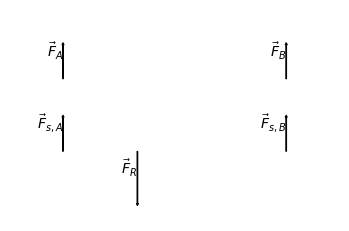

In [4]:
import numpy as np
from matplotlib.patches import FancyArrow
import matplotlib.pyplot as plt
spring_length = 3
beam_length = 6
vectors = {
    'F_{s,A}': {'origin': np.array([0,0]), 'vector': np.array([0,0.5 * spring_length])},
    'F_{s,B}': {'origin': np.array([beam_length,0]), 'vector': np.array([0,0.5 * spring_length])},
    'F_R': {'origin': np.array([beam_length / 3,0]), 'vector': np.array([0,-0.75 * spring_length])},
    'F_A': {'origin': np.array([0,spring_length]), 'vector': np.array([0,0.5 * spring_length])},
    'F_B': {'origin': np.array([beam_length,spring_length]), 'vector': np.array([0,0.5 * spring_length])},
}
figure, axes = plt.subplots()
axes.set_xlim([-0.5 * spring_length, beam_length + 0.5 * spring_length])
axes.set_ylim([-spring_length,2 * spring_length])

for label, vector_dictionary in vectors.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], vector[0], vector[1],
    width=.02,length_includes_head=True, color='k')
    axes.text(origin[0] + 0.5*vector[0],
              origin[1] + 0.5*vector[1],
              r'$\vec{'+label[0]+r'}' + label[1:] + r'$', color='k', fontsize=14,
              va='bottom',ha='right'
                              )
    axes.add_patch(vector_arrow)

axes.axis('off')
plt.show()

## Section 5.3 Equations of Equilibrium
* Equilibrium in 2D - $\sum F_x = 0$, $\sum F_y = 0$, and $\sum M_O = 0$ (5-2)
* Alternate set of equations - $\sum F_x = 0$, $\sum M_A = 0$, and $\sum M_B = 0$ (5-3), using these equations require a line passing through points $A$ and $B$ is not parallel to the $y$ axis
* Another alternate set of equations - $\sum M_A = 0$, $\sum M_B = 0$, and $\sum M_C = 0$, all points $A$, $B$, and $C$ do not lie on the same line
* Procedure for Analysis - establish x,y coordinate axes, remove all supports and draw an outlined shape of the body, show all forces and couple moments acting on the body, label loadings and specify their directions relative to the $x$ or $y$ axis, the sense of a force or couple moment having an unknown magnitude but known line of action can be assumed. Then apply moment equation of equilibrium about a point $O$ that lies at the intersection of the lines of action of two unknown forces, apply the force equilibrium equations and orient the $x$ and $y$ axes along lines that will provide the simplest resolution of the forces into their $x$ and $y$ components, finally if the solution of equilibrium is a negative scalar for a force or couple moment magnitude, then the sense is opposite to what was assumed

## Section 5.4 Two-and Three-Force Members
* Two-Force Members - has forces applied at only two points on the member, to satisfy force equilibrium $F_A$ and $F_B$ must be equal in magnitude but opposite in direction, $\sum \vec F = 0$, moment equilibrium requires $F_A$ and $F_B$ share the sane line of action, only happens when if they are directed along the line joining two points $A$ and $B$, $\sum \vec M_A = 0$ or $\sum \vec M_B = 0$. Two-force member systems the two forces acting on the member must have same magnitude, but opposite direction, have the same line of action, directed along the line joining the two points where these forces act
* Three-Force Members - member subjected to only three forces, moment equilibrium can be satisfied only if the three forces form a concurrent or parallel force system, if the lines of action of $\vec F_1$ and $\vec F_2$ intersect at point $O$ then the line of action of $\vec F_3$ must also pass through point $O$ so that the forces satisfy $\sum \vec M_O = 0$, if the three forces are parallel, the location of the point of intersection $O$ will approach infinity.

Problem 36
The beam of negligible weight is supported
horizontally by two springs. If the beam is horizontal and
the springs are unstretched when the load is removed,
determine the angle of tilt of the beam when the load is
applied.
<img src="pictures\problem_5_36.png" width="512"/>

In [5]:
import numpy as np
import scipy.integrate as integrate
force = 600
force_distance = 3
w = lambda x: (force/force_distance) * x
x_w =lambda x: x * (force/force_distance) * x
k_A = 1000
k_B = 1500

displacement = integrate.quad(x_w, 0,3)[0] / integrate.quad(w, 0,3)[0]
print(displacement)
F_R = force * force_distance / 2
#moment_C = 0 = -F_R * 2 + F_B(6)
force_coefficients = np.array([
    [1,1],
    [0,1]
])
right_hand_side = np.array([1 , 1/3]) * F_R
reaction_forces = np.linalg.solve(force_coefficients, right_hand_side)
F_A = reaction_forces[0]
F_B = reaction_forces[1]
s_A = F_A / k_A
s_B = F_B / k_B
for variable in [F_A,F_B,F_R,s_A,s_B]:
    print(f'{[name for name in globals() if globals()[name] is variable][0] } = {variable}')

#6 sin(theta) = .4
theta = np.degrees(np.arcsin(.4/6))
print(f'\u0398 = {theta:1.1f}\u00B0')

2.0
F_A = 600.0
F_B = 300.0
F_R = 900.0
s_A = 0.6
s_B = 0.2
Θ = 3.8°


## Section 5.5 Free-Body Diagrams - 3D
* As in 2D case a force is developed by a support that restricts the translation of its attached member
* A couple moment is developed when rotation of the attached member is prevented
* Ball-and-socket joint - prevents any translation of the connecting member, a force acts on the member at the point of connection, $\vec F$ has 3 magnitudes $F_x$,$ F_y$,$ F_x$, $F = \sqrt{F_x^2 + F_y^2 + F_z^2}$, force's orientation are defined by coordinate direction angles, $\alpha$,$\beta$,$\gamma$. Connecting member is allowed to rotate freely about any axis, no couple moment is resisted by a ball-and-socket join.
* Same setup to draw a Free-Body Diagram as in 2D except with 3 axes

## Section 5.6 Equations of Equilibrium
* Equilibrium of a rigid body - $\vec F_R = 0$ and $(\vec M_R)_O = 0$
* Vector Equations of Equilibrium - $\sum \vec F = 0$ and $\sum \vec M_O = 0$ (5-5)
* Scalar Equations of Equilibrium - $\sum F_x = 0$, $\sum F_y = 0$, and $\sum F_z = 0$ (5-6a) and $\sum M_x = 0$, $\sum M_y = 0$, and $\sum M_z = 0$ (5-6b)

## Section 5.7 Constraints and Statical Determinacy
* For a rigid body to be in equilibrium it also must be properly held or constrained by its supports as well as satisfying equations of equilibrium, the lines of action of the reactive forces cannot intersect a common axis and are not parallel to each other
* If a body has redundant supports, i.e. there is more supports than necessary to hold it in equilibrium, then it is statically indeterminate
* Statically indeterminate - there will be more unknown loadings on the body than equations of equilibrium available for their solution
* To solve a statically indeterminate problem we can obtain the other equations needed from the deformation conditions at the point of support. These equations deal with the physical properties of the body.
* A body is improperly constrained if all the reactive forces intersect at a common point or pass through a common axis, or if all reactive forces are parallel to each other.
* Having same number of unknowns reactive forces as equations does not guarantee that a body will be stable under a load


Problem 82
The sign has a mass of 100 kg with center of mass
at G. Determine the x, y, z components of reaction at the
ball-and-socket joint A and the tension in wires BC and BD.
<img src="pictures\problem_5_82.png" width="330"/>


AttributeError: 'AxesSubplot' object has no attribute 'set_zlim'

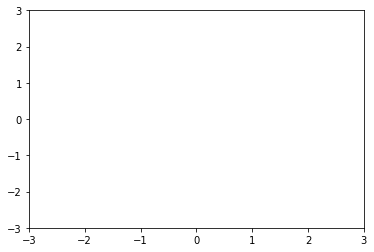

In [6]:
import numpy as np
from matplotlib.patches import FancyArrow
import matplotlib.pyplot as plt
mass = 100
weight = mass * 9.81

vectors = {
    'F_{B,C}': {'origin': np.array([0,2,0]), 'vector': np.array([-1,-1,1])},
    'F_{B,D}': {'origin': np.array([0,2,0]), 'vector': np.array([1,-1,1])},
    'W': {'origin': np.array([0,1,-1]), 'vector': np.array([0,0,-weight])},
    'F_{A,x}': {'origin': np.array([0,0,0]), 'vector': np.array([1,0,0])},
    'F_{A,y}': {'origin': np.array([0,0,0]), 'vector': np.array([0,1,0])},
    'F_{A,z}': {'origin': np.array([0,0,0]), 'vector': np.array([0,0,1])},

}
figure, axes = plt.subplots()
axes.set_xlim([-3,3])
axes.set_ylim([-3,3])
axes.set_zlim([-3,3])

for label, vector_dictionary in vectors.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], origin[2], vector[0], vector[1], vector[2],
    width=.02,length_includes_head=True, color='k')
    axes.text(origin[0] + 0.5*vector[0],
              origin[1] + 0.5*vector[1],
              r'$\vec{'+label[0]+r'}' + label[1:] + r'$', color='k', fontsize=14,
              va='bottom',ha='right'
                              )
    axes.add_patch(vector_arrow)

axes.axis('off')
plt.show()

In [ ]:
import numpy as np
from astropy.constants import g0
position_vector_A = np.array([0,0,0])
position_vector_B = np.array([0,2,0])
position_vector_C = np.array([1,0,2])
position_vector_D = np.array([-2,0,1])
mass = 100

weight = np.array([0,0,-mass * 9.81])
position_vector_AB = position_vector_B - position_vector_A
position_vector_BC = position_vector_C - position_vector_B
position_vector_BD = position_vector_D - position_vector_B
magnitude_position_vector_AB = np.linalg.norm(position_vector_AB)
magnitude_position_vector_BC = np.linalg.norm(position_vector_BC)
magnitude_position_vector_BD = np.linalg.norm(position_vector_BD)
unit_vector_BC = position_vector_BC / magnitude_position_vector_BC
unit_vector_BD = position_vector_BD / magnitude_position_vector_BD
unit_vector_AB = position_vector_AB / magnitude_position_vector_AB
#position_vector_AB cross (F_BC + F_BD) + j cross weight = 0
#force = np.cross(position_vector_AB, (F_BC + F_BD))
new_coefficients = np.array([
    [unit_vector_BC[0],unit_vector_BD[0]],
    [unit_vector_BC[2],unit_vector_BD[2]]
])
new_right_hand_side = np.array([0,-0.5 * weight[2]])
new_solve = np.linalg.solve(new_coefficients,new_right_hand_side)

Force_BC = new_solve[0] * unit_vector_BC
Force_BD = new_solve[1] * unit_vector_BD
Force_A = - Force_BC - Force_BD - weight
print(Force_BC)
print(Force_BD)
print(weight)
# print(new_solve)
print(Force_A)


In [ ]:
import numpy as np
test_matrix = np.array([
    [1,1],
    [0,1]
])
right_hand_side = np.array([3,2])
print(np.linalg.solve(test_matrix,right_hand_side))